# Required dependencies

In [1]:
import model
from stable_baselines import PPO2
import os
import time
from utils import make_vec_envs
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [14]:
print(os.getcwd())

/mnt/d/RL research


# Defining the parameters and loading the model and environment

In [2]:
game = 'zelda'
representation = 'wide'
long_path_model_path = '/mnt/d/RL research/gym-pcgrl/runs/zelda_wide_9_log/best_model.pkl'
More_enemies_model_path = '/mnt/d/RL research/gym-pcgrl/runs/zelda_wide_5_more_enemies_log/best_model.pkl'
base_model_path = '/mnt/d/RL research/gym-pcgrl/models/zelda/wide/model_1.pkl'
kwargs = {
    'change_percentage': 0.4,
    'verbose': True
}

if game == "binary":
    model.FullyConvPolicy = model.FullyConvPolicyBigMap
elif game == "zelda":
    model.FullyConvPolicy = model.FullyConvPolicyBigMap
elif game == "sokoban":
    model.FullyConvPolicy = model.FullyConvPolicySmallMap

long_path_agent = PPO2.load(long_path_model_path)
more_enemies_agent = PPO2.load(More_enemies_model_path)
base_agent = PPO2.load(base_model_path)


env_name = '{}-{}-v0'.format(game, representation)
if game == "binary":
    kwargs['cropped_size'] = 28
elif game == "zelda":
    kwargs['cropped_size'] = 22
elif game == "sokoban":
    kwargs['cropped_size'] = 10
    


Loading a model without an environment, this model cannot be trained until it has a valid environment.









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/shnifel/.local/lib/python3.7/site-packages/cloudpickle/cloudpickle.py:704: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpicke is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [3]:
def calculate_kl_divergence(distribution_A, distribution_B):
    
    distribution_A = np.array(distribution_A)
    distribution_B = np.array(distribution_B)
    distribution_A /= np.sum(distribution_A)
    distribution_B /= np.sum(distribution_B)
    
 
    kl_A_B = stats.entropy(distribution_A, distribution_B)
    kl_B_A = stats.entropy(distribution_B, distribution_A)
    
    
    return 0.5 * (kl_A_B + kl_B_A)


def calculate_action_variance(pattern_frequencies, tile_counts):
   
    weighted_frequencies = np.array(pattern_frequencies) * np.array(tile_counts)
    
    
    return np.std(weighted_frequencies)


def extract_tile_patterns(env, n):
    
   # Render the environment state as a PIL Image
    state = env.render(mode='rgb_array')
    
    # Convert the PIL Image to a NumPy array
    state_array = np.array(state)
    
    # Ensure 'state_array' is a 2D or 3D array (common for images)
    if len(state_array.shape) not in [2, 3]:
        raise ValueError(f"Unexpected shape of render output: {state_array.shape}")
    
    # Extract n x n patterns from the environment's state
    patterns = []
    for i in range(0, state_array.shape[0] - n + 1):
        for j in range(0, state_array.shape[1] - n + 1):
            patterns.append(state_array[i:i+n, j:j+n])
    
    return patterns

# Run Model

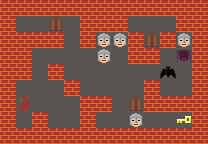

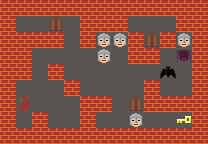

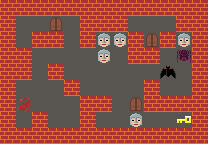

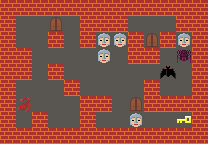

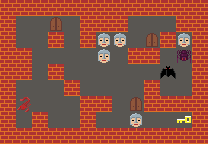

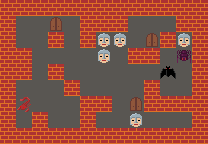

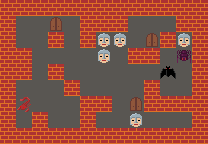

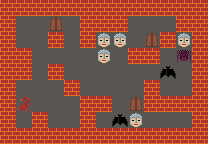

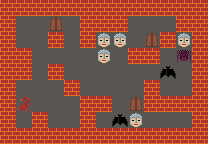

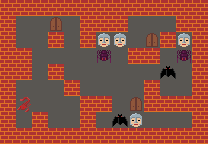

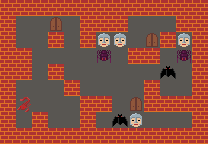

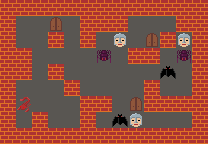

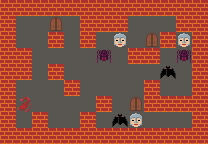

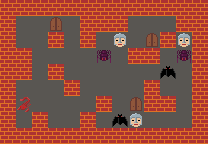

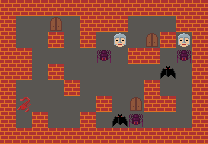

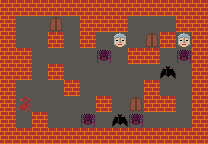

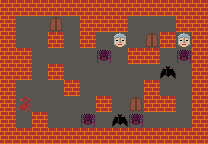

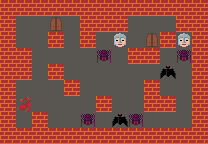

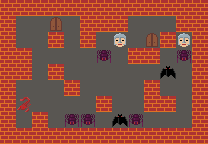

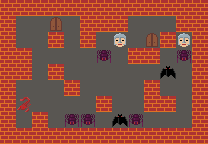

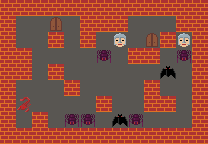

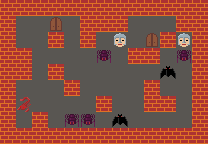

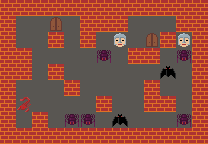

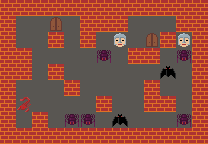

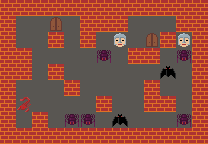

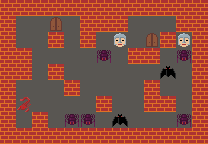

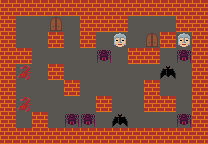

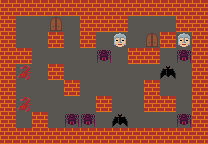

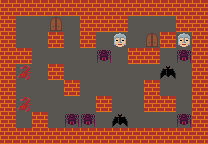

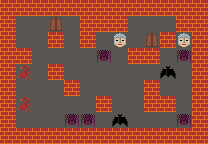

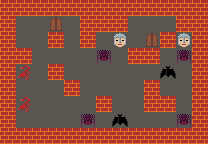

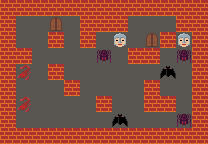

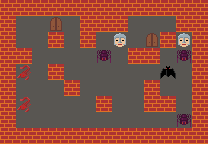

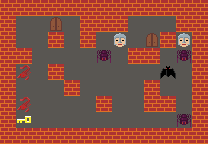

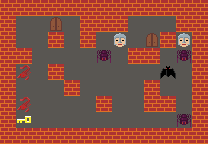

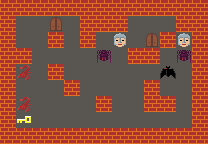

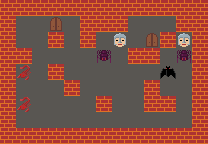

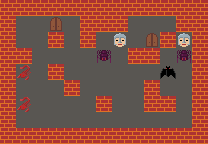

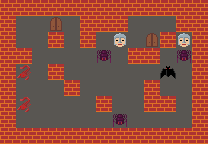

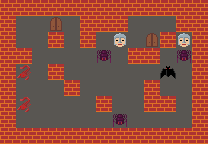

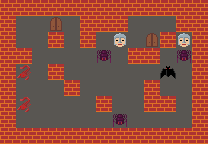

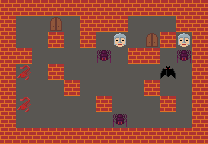

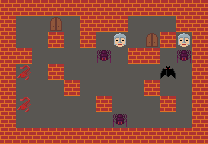

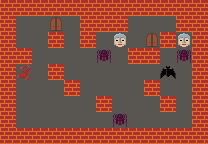

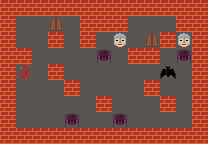

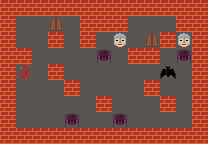

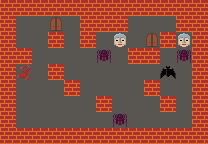

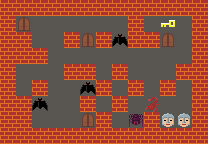

0

In [17]:
env = make_vec_envs(env_name, representation, None, 1, **kwargs)
def show_state(env, step=0, changes=0, total_reward=0, name=""):
    fig = plt.figure(10)
    plt.clf()
    plt.title("{} | Step: {} Changes: {} Total Reward: {}".format(name, step, changes, total_reward))
    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def infer(env, agent, **kwargs):
    plt.ioff()
    obs = env.reset()
    dones = False
    total_rewards = 0
    tile_patterns = []
    actions = []
    previnfo= [{"player": 0, "key": 0 , "door": 0 , "path-length" : 0}]

    while not dones:
        
        action, _ = agent.predict(obs)
        actions.append(action)
        obs, rewards, dones, info = env.step(action)
        
        # print("Prev:")
        # print("player: ", previnfo[0]["player"])
        # print("key: ", previnfo[0]["key"])
        # print("door: ", previnfo[0]["door"])
        # print("path-length: ", previnfo[0]["path-length"])
        
        # print("player: ", info[0]["player"])
        # print("key: ", info[0]["key"])
        # print("door: ", info[0]["door"])
        # print("path-length: ", info[0]["path-length"])
        prevobs,prevrewards,prevdoens,previnfo = obs, rewards, dones, info
        
       
        image = env.render(mode='rgb_array')    
        image.show()
        # rgb_image = env.render(mode='rgb_array') 
        # rgb_image.show()
        
        #show_state(env, info[0]['iterations'], info[0]['changes'], total_rewards)    
        if dones:
           
            if info[0]["player"]==1 and info[0]["key"]==1 and info[0]["door"]==1 and info[0]["path-length"]!=0:
                print("player: ", info[0]["player"])
                print("key: ", info[0]["key"])
                print("door: ", info[0]["door"])
                print("path-length: ", info[0]["path-length"])
                
                # rgb_image = env.render(mode='rgb_array')
                # rgb_image.save('image_name.png')
                 
            break
   
        
            
  
    plt.ion()
  
    env.close()
    return  info[0]["path-length"]
        
    # if kwargs.get('verbose', False):
    #     print(info[0])
infer(env,long_path_agent)

In [ ]:
base_agent_pathlength = []
more_enemies_agent_pathlength = []
long_path_agent_pathlength = []

base_agent_kl_diversity = []
more_enemies_agent_kl_diversity = []
long_path_agent_kl_diversity = []

base_agent_actionvariance = []
more_enemies_agent_actionvariance = []
long_path_agent_actionvariance = []



while(len(base_agent_pathlength)<100):

    path = infer(env, base_agent, **kwargs)
    if path!=0:
        base_agent_pathlength.append(path)
  
 
while(len(more_enemies_agent_pathlength)<100):
    path = infer(env, more_enemies_agent, **kwargs)
    if path!=0:
        more_enemies_agent_pathlength.append(path)
   

while(len(long_path_agent_pathlength)<100):
    path = infer(env, long_path_agent, **kwargs)
    if path!=0:
        long_path_agent_pathlength.append(path)

In [13]:
print("Base_agent")
print(base_agent_pathlength)
print("Mean: ",np.mean(base_agent_pathlength))
print("Max: ", np.max(base_agent_pathlength))
print("More enemies")
print(more_enemies_agent_pathlength)
print("Mean: ", np.mean(more_enemies_agent_pathlength))
print("Max: ", np.max(more_enemies_agent_pathlength))
print("long-path")
print(long_path_agent_pathlength)
print("Mean: ",np.mean(long_path_agent_pathlength))
print("Max: ", np.max(long_path_agent_pathlength))


Base_agent
[16, 27, 30, 21, 18, 20, 25, 24, 28, 21, 28, 20, 24, 28, 27, 16, 20, 16, 30, 27, 34, 18, 20, 29, 28, 18, 14, 20, 18, 16, 14, 21, 25, 26, 30, 27, 30, 16, 20, 32, 26, 25, 24, 19, 29, 23, 33, 16, 20, 24, 22, 24, 14, 18, 25, 18, 26, 16, 26, 32, 16, 27, 19, 32, 27, 25, 31, 16, 22, 14, 16, 23, 22, 19, 30, 17, 24, 30, 24, 16, 34, 18, 22, 22, 19, 28, 31, 23, 18, 26, 18, 20, 22, 23, 29, 30, 25, 14, 26, 28]
Mean:  23.08
Max:  34
More enemies
[6, 19, 17, 18, 16, 20, 11, 15, 11, 14, 9, 19, 15, 16, 22, 8, 14, 22, 9, 18, 12, 20, 15, 11, 21, 11, 16, 19, 11, 18, 5, 24, 24, 26, 21, 21, 20, 16, 23, 23, 8, 19, 12, 17, 8, 13, 16, 13, 16, 11, 7, 17, 19, 16, 12, 16, 18, 21, 13, 15, 18, 17, 22, 19, 34, 10, 20, 23, 12, 21, 9, 23, 19, 20, 18, 25, 11, 12, 15, 17, 15, 17, 17, 11, 7, 18, 17, 16, 9, 16, 12, 7, 27, 17, 20, 14, 31, 14, 17, 12]
Mean:  16.22
Max:  34
long-path
[13, 5, 3, 7, 12, 20, 7, 16, 3, 21, 8, 12, 8, 26, 9, 11, 19, 7, 10, 22, 26, 22, 30, 25, 16, 9, 10, 34, 15, 11, 31, 23, 7, 8, 16, 16,